In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

In [10]:
def linear(p,x):
    return p[0]*x + p[1]

def residual(p,func, xvar, yvar, err):
    return (func(p, xvar) - yvar)/err

In [11]:
# The code below defines our data fitting function.
# Inputs are:
# initial guess for parameters p0
# the function we're fitting to
# the x,y, and dy variables
# tmi can be set to 1 or 2 if more intermediate data is needed

def data_fit(p0, func, xvar, yvar, err, tmi=0):
    try:
        fit = optimize.least_squares(residual, p0, args=(func,xvar, yvar, err), verbose=tmi)
    except Exception as error:
        print("Something has gone wrong:", error)
        return p0, np.zeros_like(p0), np.nan, np.nan
    pf = fit['x']

    print()

    try:
        cov = np.linalg.inv(fit['jac'].T.dot(fit['jac']))          
        # This computes a covariance matrix by finding the inverse of the Jacobian times its transpose
        # We need this to find the uncertainty in our fit parameters
    except:
        # If the fit failed, print the reason
        print('Fit did not converge')
        print('Result is likely a local minimum')
        print('Try changing initial values')
        print('Status code:', fit['status'])
        print(fit['message'])
        return pf, np.zeros_like(pf), np.nan, np.nan
            #You'll be able to plot with this, but it will not be a good fit.

    chisq = sum(residual(pf, func, xvar, yvar, err) **2)
    dof = len(xvar) - len(pf)
    red_chisq = chisq/dof
    pferr = np.sqrt(np.diagonal(cov)) # finds the uncertainty in fit parameters by squaring diagonal elements of the covariance matrix
    print('Converged with chi-squared {:.2f}'.format(chisq))
    print('Number of degrees of freedom, dof = {:.2f}'.format(dof))
    print('Reduced chi-squared {:.2f}'.format(red_chisq))
    print()
    Columns = ["Parameter #","Initial guess values:", "Best fit values:", "Uncertainties in the best fit values:"]
    print('{:<11}'.format(Columns[0]),'|','{:<24}'.format(Columns[1]),"|",'{:<24}'.format(Columns[2]),"|",'{:<24}'.format(Columns[3]))
    for num in range(len(pf)):
        print('{:<11}'.format(num),'|','{:<24.3e}'.format(p0[num]),'|','{:<24.3e}'.format(pf[num]),'|','{:<24.3e}'.format(pferr[num]))
    return pf, pferr, chisq,dof

## Data

In [14]:
day1 = pd.read_csv('./data/scattering_1.csv')
day2= pd.read_csv('./data/scattering_2.csv')

In [17]:
theta_1 = day1['theta'] * 180/np.pi
channel_1 = day1['centroid'] / (day1['gain'] * day1['fine_gain'])
energy_1, energy_err_1 = calibrate1(channel_1)

theta_2 = day2['theta'] * 180/np.pi
channel_2 = day2['centroid'] / (day2['gain'] * day2['fine_gain'])
energy_2, energy_err_2 = calibrate2(channel_2)

NameError: name 'calibrate1' is not defined

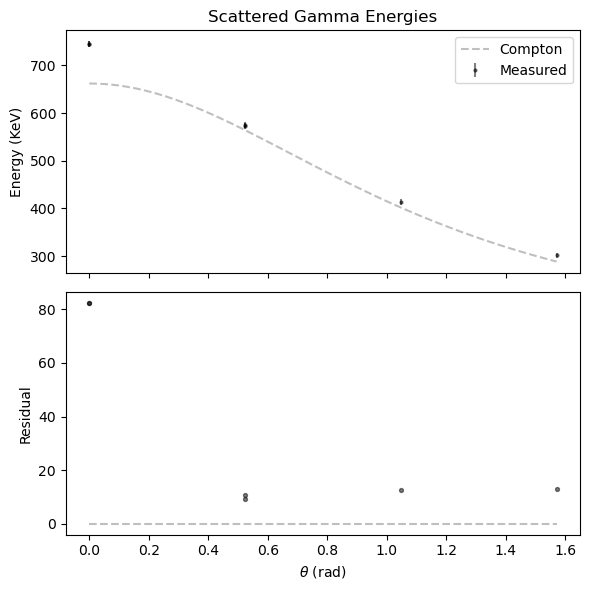

In [8]:
E_prime = lambda theta : 662 / (1 + (662/511) * (1 - np.cos(theta)))

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

thetas = np.linspace(data['theta'].min(), data['theta'].max())
ax0.errorbar(data['theta'], data['energies'], yerr=data['energies_err'], fmt='k.', markersize=4, alpha=0.5, label='Measured')
ax0.plot(thetas, E_prime(thetas), color='k', linestyle='dashed', alpha=0.25, label='Compton')

#ax0.set_xlabel('$\\theta$ (rad)')
ax0.set_ylabel('Energy (KeV)')
ax0.set_title('Scattered Gamma Energies')
ax0.legend()

residuals = data['energies'] - E_prime(data['theta'])
ax1.scatter(data['theta'], residuals, color='k', s=8, alpha=0.5, label='Measured')
ax1.hlines(y=0, xmin=data['theta'].min(), xmax=data['theta'].max(), color='k', linestyle='dashed', alpha=0.25, label='Compton')
ax1.set_xlabel('$\\theta$ (rad)')
ax1.set_ylabel('Residual')
plt.tight_layout()